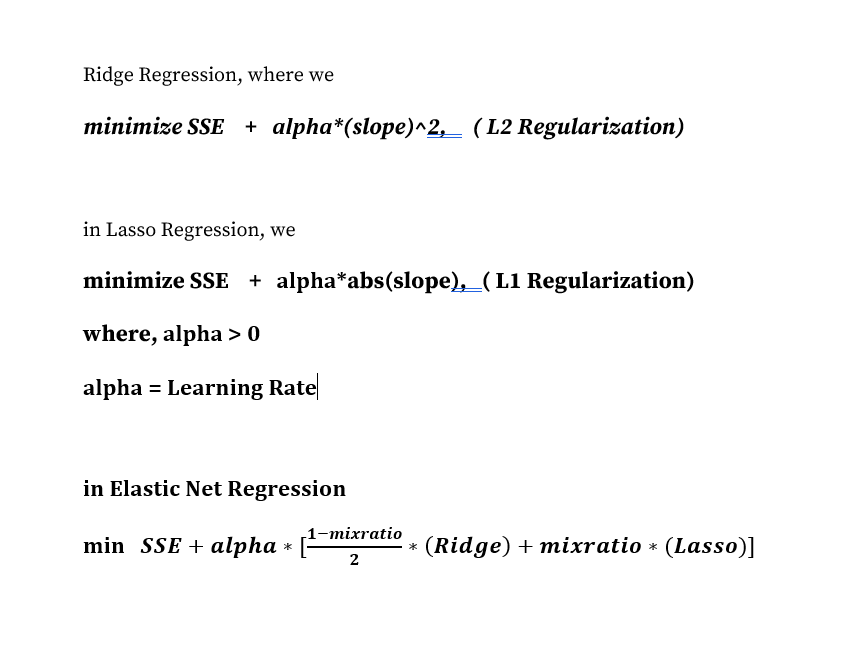

In [2]:
import os

os.chdir('D:/Codes/Lin_reg')

from IPython.display import Image

Image(filename='Ridge_Lasso_formula.png')

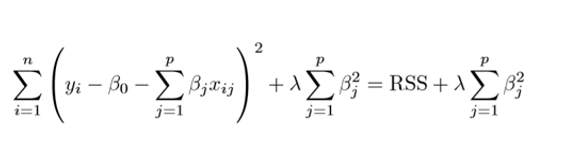

In [1]:
import os

os.chdir('D:/Codes/Lin_reg')

from IPython.display import Image

Image(filename='ridge.png')

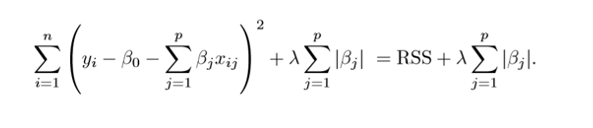

In [2]:
Image(filename='Lasso_L1.png')

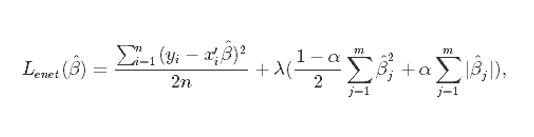

In [3]:
Image(filename='elasticNet.png')

In [4]:
#Let's start with importing necessary libraries

import os # For changing the working directory
import pandas as pd # For dataframe processing
import numpy as np # For numpy calculations
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.linear_model  import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.linear_model  import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization
sns.set()

In [5]:
os.chdir('D:/MLP_Session_26_JULY/DATASET')

data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
# Checking the Missing values

data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [9]:
# Missing value imputation

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [10]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

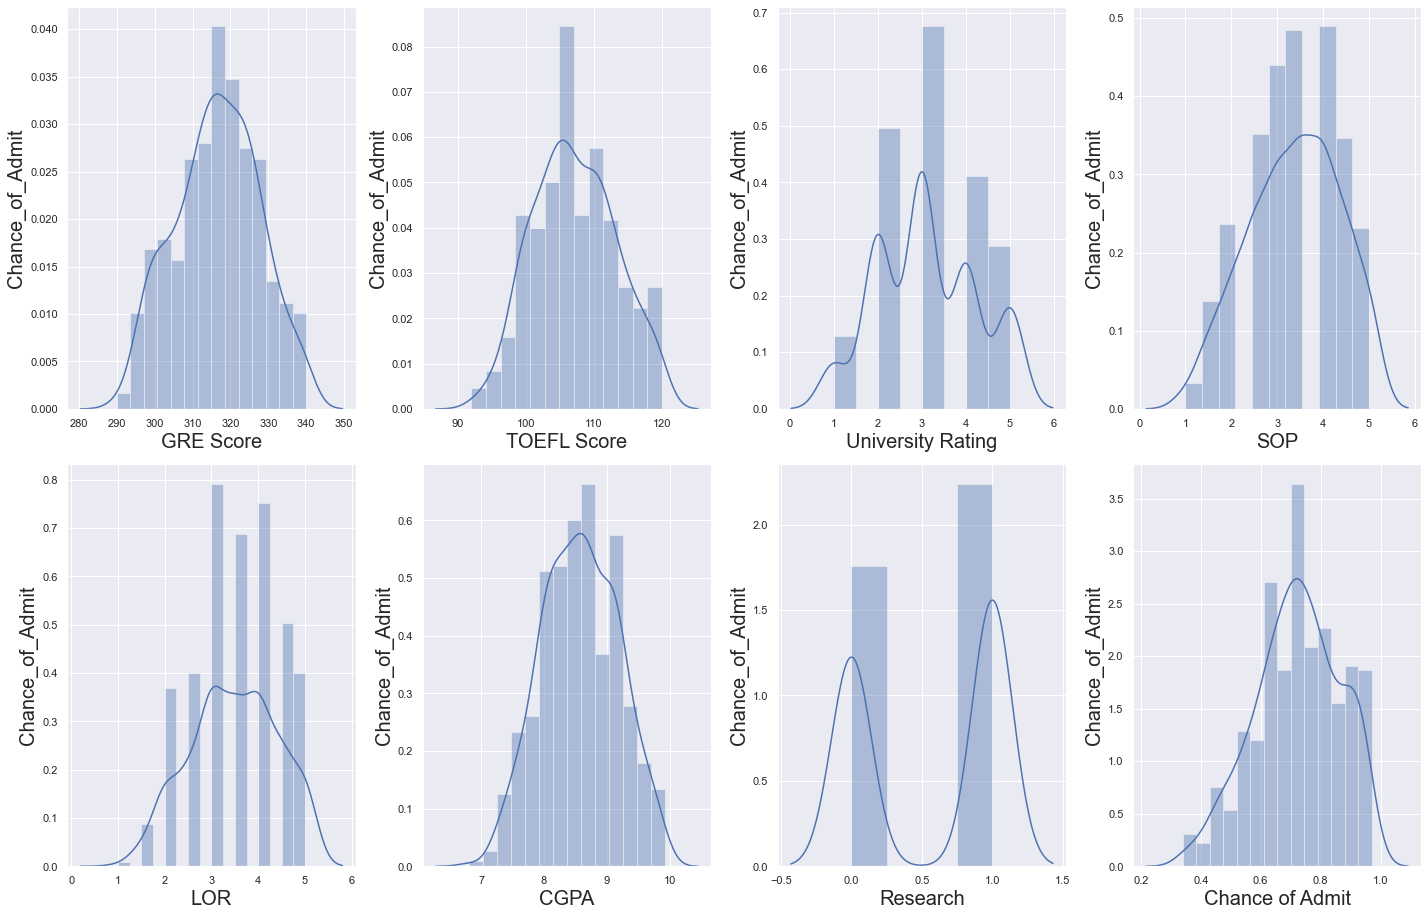

In [12]:
# let's see how data is distributed for every column
# To check skewness

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance_of_Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [13]:
# Creating the Independent and Dependent variables

y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

In [14]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [15]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

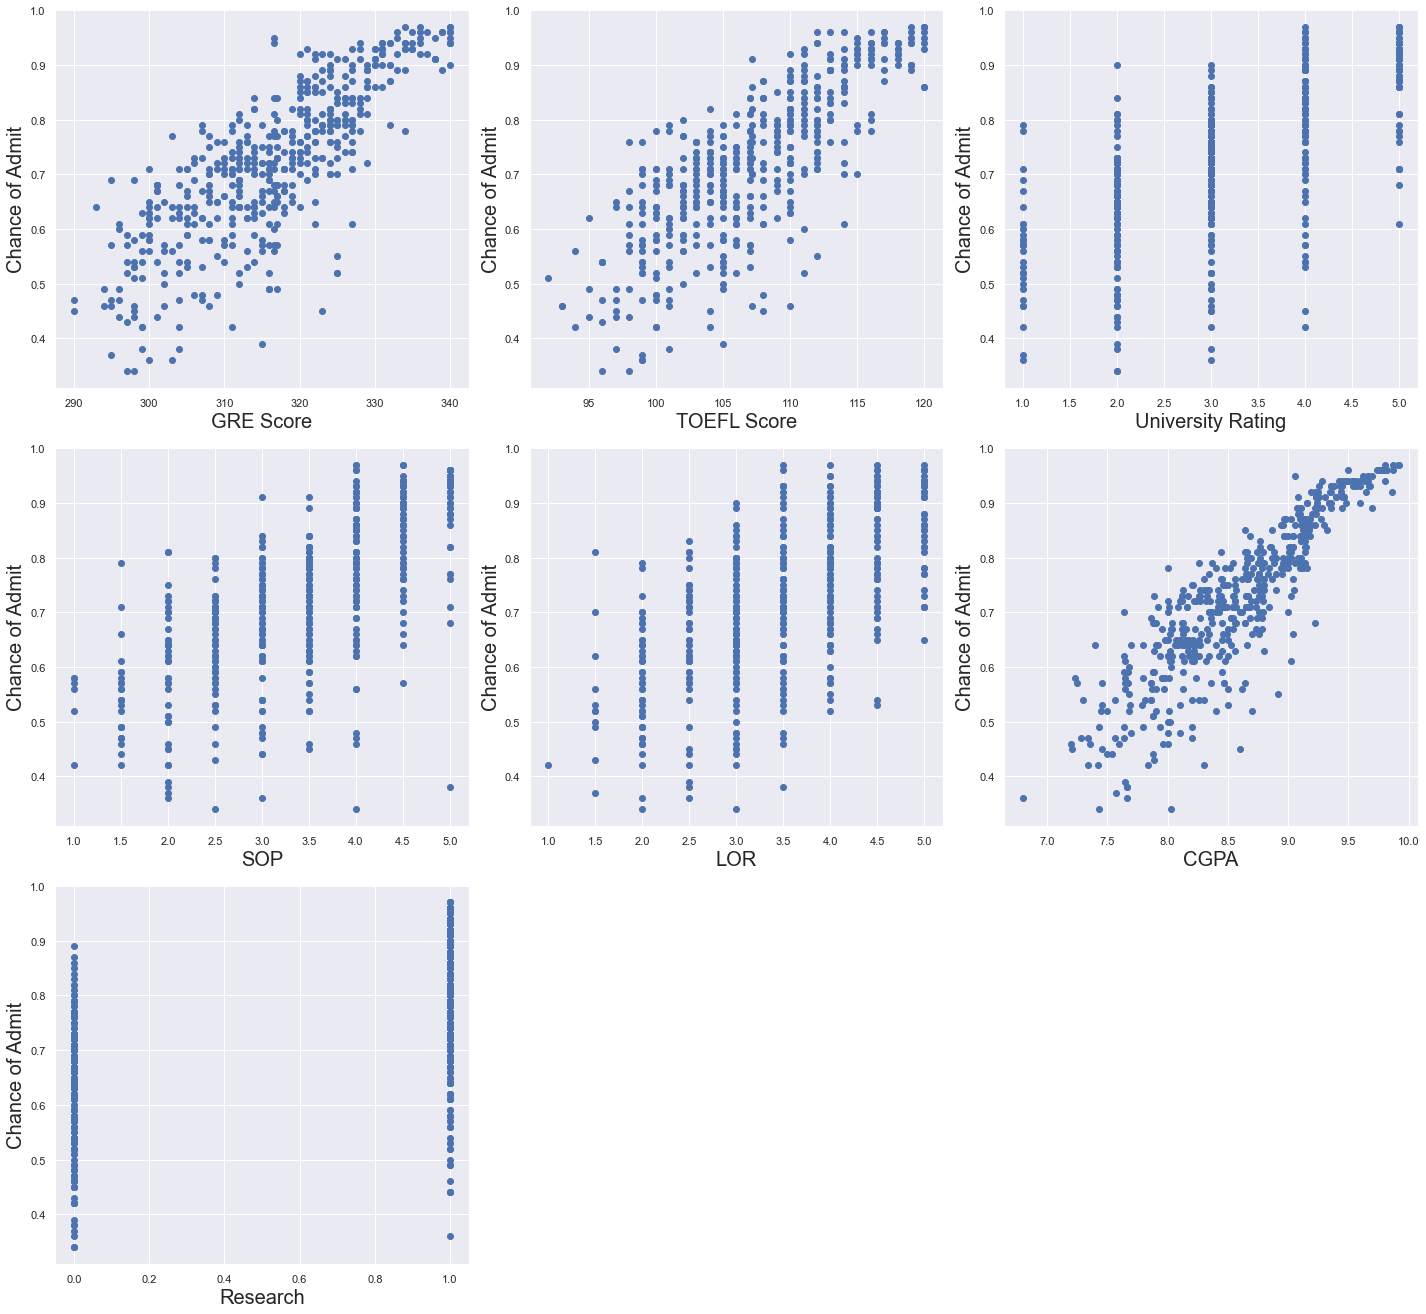

In [16]:
# To check Linearity assumption

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
# Scaling down the data

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [18]:
# Checking for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

In [19]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [20]:
# Creating Train-Test split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=123)

In [21]:
# Fitting the Model on the Training data

regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [22]:
# R square for Training data

regression.score(x_train,y_train)

0.8253272779819419

In [23]:
# R square for Test data

regression.score(x_test,y_test)

0.8011526311863125

In [24]:
# Using Ridge regression model

ridge = Ridge()

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.78231925, 7.15737715, 8.84228292, 8.25819926, 4.08682217,
       9.07644919, 4.45088431, 9.34992366, 8.66105113, 9.9789958 ,
       9.94472349, 2.73451888, 3.93239945, 1.3252287 , 4.67622441,
       7.43322612, 1.04882508, 6.66540671, 6.3476135 , 4.39771985,
       9.13059039, 1.52215663, 1.24700714, 0.40707933, 6.31218342,
       4.38563639, 2.95500998, 4.01502013, 0.66113043, 4.73256412,
       2.17235043, 2.52833935, 2.19392865, 8.91577375, 8.11172277,
       0.12750625, 3.40100781, 4.26495059, 4.9065593 , 7.6244019 ,
       3.0009375 , 7.82539603, 1.14661297, 2.51304393, 4.52771211,
       0.75183706, 7.22782718, 5.60455482, 0.02702216, 5.72300491]),
        cv=10, normalize=True)

In [25]:
ridgecv.alpha_

0.027022163327674598

In [26]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.027022163327674598)

In [27]:
# R square after Ridge regularization
# More or less same value. So the OLS method is not overfitting the data.

ridge_model.score(x_test, y_test)

0.801156372084439

In [43]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [44]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

5.602166893468749e-05

In [45]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=5.602166893468749e-05)

In [46]:
# R square after Lasso regularization
# More or less same value. So the OLS method is not overfitting the data.

lasso_reg.score(x_test, y_test)

0.8012542165542798

In [47]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [48]:
elasticCV.alpha_

0.0020469353739556674

In [49]:
# l1_ratio gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [50]:
# Fitting the Model with Elastic Net Regularization

elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0020469353739556674)

In [51]:
# R square for Elastic Net Regularization

elasticnet_reg.score(x_test, y_test)

0.8010199501777818

In [52]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline   

In [53]:
#importing the dataset
dataset= pd.read_csv('poly_data.csv') 
dataset.head()   

,X,Y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25


In [59]:
x=dataset.iloc[:,0:1].values
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,0].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [60]:
y=dataset.iloc[:,1].values
y

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int64)

In [61]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

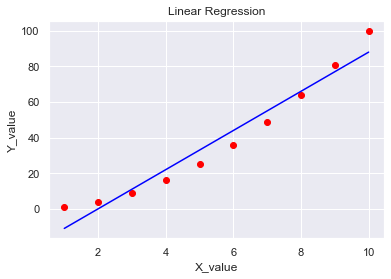

In [63]:
# Predicting the Y column
# pred_y = lin_reg.predict(x)

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('X_value')
plt.ylabel('Y_value')
plt.show()

In [64]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. 
# It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [65]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

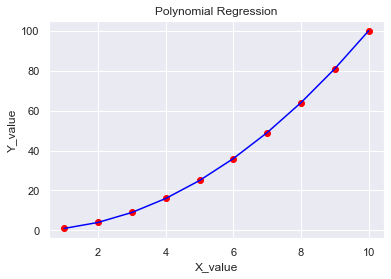

In [66]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X_value')
plt.ylabel('Y_value')
plt.show()